> <p><small><small>This Notebook is made available subject to the licence and terms set out in the <a href = "http://www.github.com/google-deepmind/ai-foundations">AI Research Foundations Github README file</a>.

![](https://storage.googleapis.com/dm-educational/assets/ai_foundations/GDM-Labs-banner-image-C4-white-bg.png)

# Lab: Visualizing Attention Weights

<a href='https://colab.research.google.com/github/google-deepmind/ai-foundations/blob/master/course_4/gdm_lab_4_1_attention_visualization.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

Explore how transformer attention weights highlight which tokens influence predictions.

10 minutes

## Overview

In this lab, you will explore how transformer models make their predictions. Transformer models rely heavily on a so-called **attention mechanism**. This mechanism allows the model to build contextual embeddings that combine information from all tokens in the prompt. When training a transformer model, this mechanism learns how much each token in the prompt should be attended to. That is, how much weight should be placed on the information of each token when building a contextual embedding to predict the next token.


Unlike in the pen-and-paper exercise you did at the beginning of this course, transformer models do not decide just once which tokens are important. Instead, they have many **layers** and the attention mechanism operates on each layer. For example, the Gemma-1B model has 26 layers.



### What you will learn  
By the end of this lab, you will:  
* Understand how attention weights indicate which tokens contribute most to predicting the next token.  
* Understand how attention can cross sentence boundaries and capture context from earlier sentences.  

### Tasks  
In this lab, you will:
* Visualize the attention weights in different layers of the Gemma-1B model for different prompts.
* Investigate the attention weights for prompts spanning multiple sentences.

If you are able to, we recommend running the code in this lab on **a Colab instance with a GPU**. See the section "How to use Google Colaboratory (Colab)" below for instructions on how to do this.

## How to use Google Colaboratory (Colab)


Google Colaboratory (also known as Google Colab) is a platform that allows you to run Python code in your browser. The code is written in **cells** that are executed on a remote server.

To run a cell, hover over the cell and click on the `run` button to its left. The run button is the circle with the triangle (▶). Alternatively, you can also click on a cell and use the keyboard combination Ctrl+Return (or ⌘+Return if you are using a Mac).

To try this out, run the following cell. This should print today's day of the week below it.

In [ ]:
from datetime import datetime

print(f"Today is {datetime.today():%A}.")

Note that the *order in which you run the cells matters*. When you are working through a lab, make sure to always run *all* cells in order, otherwise the code might not work. If you take a break while working on a lab, Colab may disconnect you and in that case, you have to execute all cells again before  continuing your work. To make this easier, you can select the cell you are currently working on and then choose __Runtime → Run before__  from the menu above (or use the keyboard combination Ctrl/⌘ + F8). This will re-execute all cells before the current one.

### Using Colab with a GPU

A **GPU** is a special type of hardware that can significantly speed up some types of computations of machine learning models. Several of the activities in this lab will also run a lot faster if you run them on a GPU.

Follow these steps to run the activities in this lab on a GPU:

1.  In the top menu bar, click on **Runtime**.
2.  Select **Change runtime type** from the dropdown menu.
3.  In the pop-up window under **Hardware Accelerator**, select **GPU** (usually listed as `T4 GPU`).
5.  Click **Save**.

Your Colab session will now restart with GPU access.

Note that access to GPUs is limited and at times, you may not be able to run this lab on a GPU. All activities will still work but they will run slower and you will have to wait longer for some of the cells to finish running.


## Imports

In this lab, you will make use of the custom `ai_foundations` package that provides methods for loading Gemma-1B and visualizing its attention weights.

Run the following cell to import the required packages.

In [1]:
%%capture

# Install the custom package for this course.
!pip install orbax-checkpoint==0.11.21
!pip install "git+https://github.com/google-deepmind/ai-foundations.git@main"

from ai_foundations import generation # For loading and prompting Gemma.
from ai_foundations import visualizations # For attention weight visualization.

 ## Load the model

Run the following cell to load the Gemma-1B model. You will use this model to generate the next token and compute its attention weights. This cell also initializes a cache that speeds up the visualizations if you only adjust the layer parameter.


In [2]:
# Initialize caches for prompts.
previous_prompt = None
previous_prompt2 = None

# Load special version of the Gemma-1B model that provides access to attention
# weights.
print("Loading Gemma-1B...")
model = generation.load_gemma("Gemma-1B-AttentionWeight")
print("Loaded Gemma-1B.")

Loading Gemma-1B...
Loaded Gemma-1B.


## Visualize attention weights for single-sentence prompts

------
> **💻 Your task:**
>1. Enter a prompt below and run the cell to visualize the attention weights for a specific layer.
>2. Investigate how the weights change across layers. Does the model attend to the same tokens in each layer? Do the attention weights line up with what you think is important for making predictions?
>3. Investigate how the weights change if you add or remove words from the prompt.
>
> The code below generates a figure that shows how much the representation of each token in the prompt  matters for the prediction of the generated token. The thicker the line, the more the token representation influences the prediction of the next token at that layer.
>
> Note that transformer language models often put a high weight on the first token, the special beginning of sequence (BOS) token (reference, e.g., [Analyzing the Structure of Attention in a Transformer Language Model](https://aclanthology.org/W19-4808/) [1]). The visualizations below therefore show the lines to the BOS token (`<BOS>`) in gray to make it easier to see the other connections.
------

Generated text: Jide was hungry so she went looking for food.


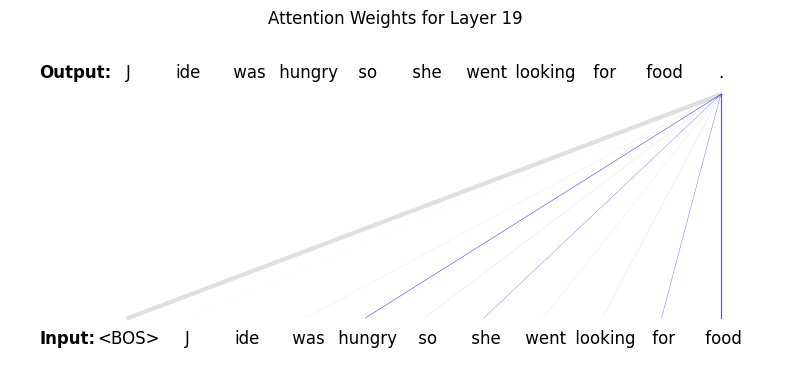

In [3]:
# @title Visualize attention weights
layer = 19  # @param {type:"slider", min: 0, max: 25}

prompt = "Jide was hungry so she went looking for food"  # @param {type: "string"}

show_all_weights = False


if prompt != previous_prompt:
    (output_text, next_token_logits, tokenizer, attention_weights, _, _) = (
        generation.prompt_attention_transformer_model(
            prompt, model, sampling_mode="greedy"
        )
    )
    tokens = [tokenizer.tokens[t] for t in tokenizer.encode(output_text)]
    previous_prompt = prompt

print(f"Generated text: {output_text}")

visualizations.visualize_attention(
    tokens,
    attention_weights[f"layer_{layer}"],
    layer,
    min_line_thickness=0,
    max_line_thickness=5,
    show_all_weights=show_all_weights
)

### What did you observe?

For the prompt "Jide was hungry so she went looking for" the model predicted the token "food" as the most likely next token. In some layers (e.g., layer 19), this prediction depends a lot on the token "hungry". In others (e.g., layer 2), this prediction depends a lot on the very local context, such as "looking for".

When you modified the prompt, you likely found similar patterns. For example, if you changed the prompt to "Jide was thirsty so she went looking for", you likely observed that in layer 19, the model relies a lot on the token "thirsty" for predicting the next token "water".

These similarities are no coincidence. As you will learn more about later in this course, attention mechanisms in different layers tend to focus on different dependencies between tokens.

## Visualize attention across sentence boundaries

Transformer models also consider tokens in previous sentences as long as they are part of the same prompt. In this activity, you will visualize the attention weights of longer prompts.

<br />

------
> **💻 Your task:**
>
>1. Enter a prompt below that spans multiple sentences. For example, you can copy the following short text from the previous exercise:
>
>    "The artist selected a shade of blue from her palette. With a steady hand, she began to paint the waves onto the canvas. She wanted to capture the power and beauty of the"
>
>2. Investigate which tokens are most important for making predictions. Are they all from the same sentence?
>3. Compare the weights for the prompt above to the weights of this prompt.
>    * In which layers do you see similar behaviors, regardless of the different text?
>    * Identify a layer focused on semantic meaning. How does it weigh tokens that are most important for understanding the context?
>    * Now, find a layer focused on grammaticality. How does it weigh tokens that are most important to ensure the sentence is grammatical?
>
------
<br>

_Note: If the visualization is difficult to read, click it to make it bigger._

In [ ]:
# @title Visualize attention weights
layer = 19  # @param {type:"slider", min: 0, max: 25}

prompt = "The artist selected a shade of blue from her palette. With a steady hand, she began to paint the waves onto the canvas. She wanted to capture the power and beauty of the"  # @param {type: 'string'}
show_all_weights = False


if prompt != previous_prompt2:
    (output_text2, next_token_logits2, tokenizer, attention_weights2, _, _) = (
        generation.prompt_attention_transformer_model(
            prompt, model, sampling_mode="greedy"
        )
    )

    tokens2 = [tokenizer.tokens[t] for t in tokenizer.encode(output_text2)]
    previous_prompt2 = prompt

print(f"Generated text: {output_text2}")

visualizations.visualize_attention(
    tokens2,
    attention_weights2[f"layer_{layer}"],
    layer,
    min_line_thickness=0,
    max_line_thickness=5,
    show_all_weights=show_all_weights,
)

Inspect the attention weights for a few more sentences. Do they match your intuitions? Are there any patterns you find surprising?

## Summary

In this brief activity, you visualized the **attention weights** of the Gemma-1B model for a range of prompts. You observed that there are certain tokens that are more important for predicting the next token than others, and that this set of tokens can change across layers. You also experimented with longer prompts and observed that the prediction of the next token can also depend on tokens in previous sentences.

In the next activities, you will learn more about the architecture of the transformer model, how it computes its attention weights and how the attention weights are used to compute contextual embeddings for predicting the next token.

## References

[1] Jesse Vig and Yonatan Belinkov. 2019. Analyzing the Structure of Attention in a Transformer Language Model. In *Proceedings of the 2019 ACL Workshop BlackboxNLP: Analyzing and Interpreting Neural Networks for NLP*. Retrieved from https://aclanthology.org/W19-4808/.